In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from shutil import rmtree
from os.path import isdir
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, LeakyReLU
from sklearn.model_selection import train_test_split

In [2]:
%load_ext tensorboard

In [3]:
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = tf.keras.datasets.fashion_mnist.load_data()

In [4]:
# plt.figure(figsize=[10,2])
# f, ax = plt.subplots(1, 10, figsize=[20,5])
# plt.imshow()
# for i in range(0, 10):
# 	image = np.reshape(x_train_raw[i], (28,28))
# 	label = y_train_raw[i]
# 	ax[i].imshow(image)
# 	ax[i].set_title(label)
	# plt.figimage(image)
# plt.show()


In [5]:
pd.DataFrame(y_train_raw).describe()

,0
count,60000.000000
mean,4.500000
std,2.872305
min,0.000000
25%,2.000000
50%,4.500000
75%,7.000000
max,9.000000


In [6]:
x_train = np.reshape(x_train_raw, (-1, 28, 28, 1))
y_train = tf.one_hot(y_train_raw, 10).numpy()
x_test = np.reshape(x_test_raw, (-1, 28, 28, 1))
y_test = tf.one_hot(y_test_raw, 10).numpy()

In [7]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1, random_state=1)

In [8]:
drop = 0.1

In [34]:
model = None
model = Sequential()

model.add(preprocessing.Resizing(28, 28))
model.add(preprocessing.Rescaling(1./255))

# model.add(preprocessing.RandomFlip())
model.add(preprocessing.RandomRotation(0.10))
# model.add(preprocessing.RandomContrast(0.05))
# model.add(preprocessing.RandomZoom(0.05, 0.05))

model.add(Conv2D(128, 7, activation=LeakyReLU(), input_shape=(28, 28, 1), padding='same'))
model.add(BatchNormalization())
# model.add(MaxPooling2D((2,2), padding='same'))
model.add(Conv2D(128, 5, activation=LeakyReLU(), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), padding='same'))
# model.add(Dropout(0.05))

model.add(Conv2D(128, 5, activation=LeakyReLU(), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, 3, activation=LeakyReLU(), padding='same'))
model.add(BatchNormalization())
# model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(128, 3, activation=LeakyReLU(), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), padding='same'))
# model.add(Dropout(0.05))

model.add(Flatten())
model.add(Dense(256, LeakyReLU()))
model.add(BatchNormalization())
model.add(Dense(128, LeakyReLU()))
model.add(BatchNormalization())
model.add(Dense(64, LeakyReLU()))
model.add(BatchNormalization())
# model.add(Dropout(0.20))

model.add(Dense(10, 'softmax'))

model.compile(tf.keras.optimizers.Adam(), tf.keras.losses.CategoricalCrossentropy(), 'accuracy')
model.build(input_shape=(1, 28, 28, 1))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resizing_5 (Resizing)        (1, 28, 28, 1)            0         
_________________________________________________________________
rescaling_5 (Rescaling)      (1, 28, 28, 1)            0         
_________________________________________________________________
random_rotation_2 (RandomRot (1, 28, 28, 1)            0         
_________________________________________________________________
conv2d_20 (Conv2D)           (1, 28, 28, 128)          6400      
_________________________________________________________________
batch_normalization_35 (Batc (1, 28, 28, 128)          512       
_________________________________________________________________
conv2d_21 (Conv2D)           (1, 28, 28, 128)          409728    
_________________________________________________________________
batch_normalization_36 (Batc (1, 28, 28, 128)         

In [35]:
learning_rate = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', min_delta=0.002, factor=0.4, patience=2) #0.001
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='loss', min_delta=0.002, patience=3, verbose=1,
    mode='auto', baseline=None, restore_best_weights=False
)

In [36]:
if isdir('./logs'):
    rmtree('./logs')
else:
    print('LOGS DOES NOT EXIST')
tbcb = tf.keras.callbacks.TensorBoard()

In [37]:
model_train = model.fit(x_train, y_train, 128, 100, 1, callbacks=[learning_rate, early_stop, tbcb], validation_data=(x_valid, y_valid)).history # 

Epoch 1/100
422/422 [==============================] - 102s 234ms/step - loss: 0.5257 - accuracy: 0.8086 - val_loss: 1.3466 - val_accuracy: 0.5655
Epoch 2/100
422/422 [==============================] - 96s 227ms/step - loss: 0.3771 - accuracy: 0.8609 - val_loss: 0.4219 - val_accuracy: 0.8527
Epoch 3/100
422/422 [==============================] - 96s 227ms/step - loss: 0.3309 - accuracy: 0.8779 - val_loss: 0.3722 - val_accuracy: 0.8662
Epoch 4/100
422/422 [==============================] - 96s 227ms/step - loss: 0.3075 - accuracy: 0.8871 - val_loss: 0.3547 - val_accuracy: 0.8758
Epoch 5/100
422/422 [==============================] - 96s 227ms/step - loss: 0.2890 - accuracy: 0.8933 - val_loss: 0.2894 - val_accuracy: 0.8933
Epoch 6/100
422/422 [==============================] - 96s 227ms/step - loss: 0.2756 - accuracy: 0.8989 - val_loss: 0.3054 - val_accuracy: 0.8900
Epoch 7/100
422/422 [==============================] - 96s 227ms/step - loss: 0.2629 - accuracy: 0.9027 - val_loss: 0.2947 

KeyboardInterrupt: 

In [32]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 6s 18ms/step - loss: 0.2396 - accuracy: 0.9325


[0.23956140875816345, 0.9325000047683716]

(7, 7, 64)
(5, 5, 64, 128)
(3, 3, 128, 128)
(3, 3, 128, 128)


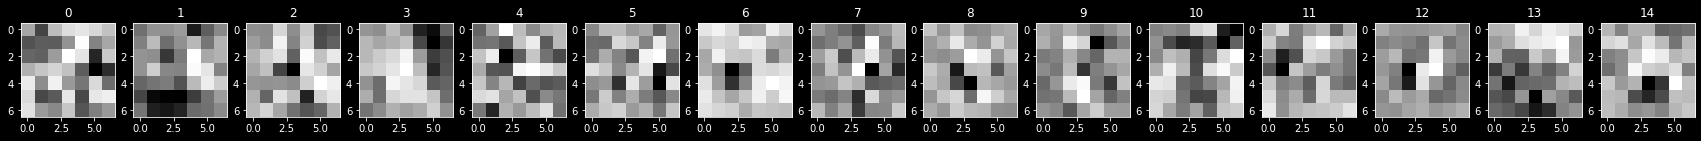

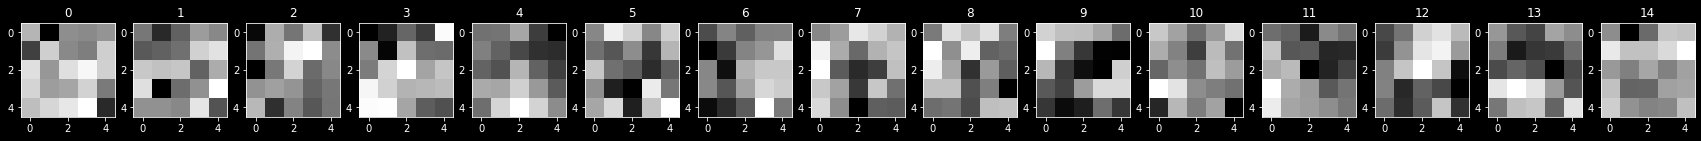

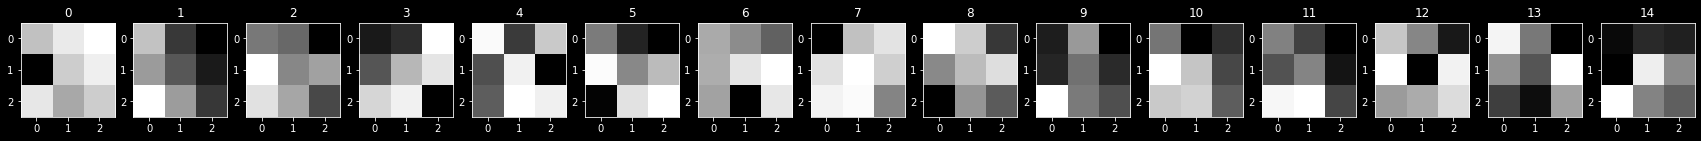

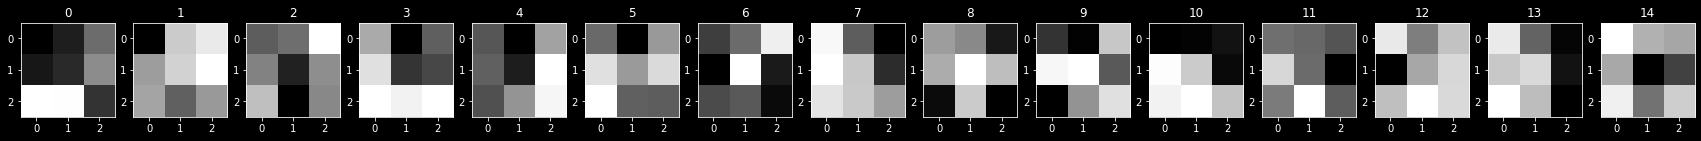

In [29]:
def plot_conv_weights(model, layer):
    W = model.get_layer(name=layer).get_weights()[0]
    if len(W.shape) == 4:
        W = np.squeeze(W)
        print(W.shape)
        if len(W.shape) == 4:
            W = W.reshape(W.shape[0], W.shape[1], W.shape[2] * W.shape[3]) 
        else:
            W = W.reshape(W.shape[0], W.shape[1], W.shape[2]) 
        fig, axs = plt.subplots(1,15, figsize=(30,30))
        # fig.subplots_adjust(hspace = .5, wspace=.001)
        axs = axs.ravel()
        for i in range(15):
            axs[i].imshow(W[:,:,i], cmap='Greys_r')
            axs[i].set_title(str(i))

for layer in model.layers:
    if 'conv' not in layer.name:
        continue
    else:
        plot_conv_weights(model, layer.name)

In [30]:
# plt.figure(figsize=[10,2])

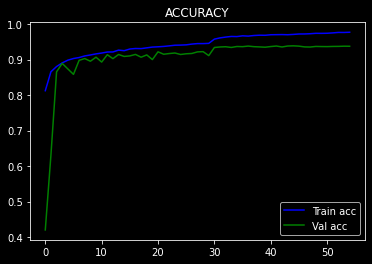

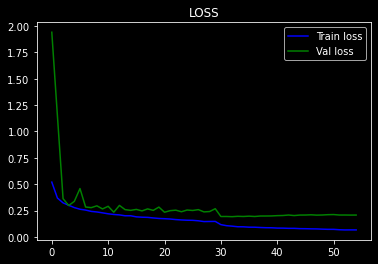

<Figure size 432x288 with 0 Axes>

In [31]:
acc = model_train['accuracy']
val_acc = model_train['val_accuracy']
loss = model_train['loss']
val_loss = model_train['val_loss']
epoch_count = range(len(acc))

plt.plot(epoch_count, acc, 'b', label='Train acc')
plt.plot(epoch_count, val_acc, 'g', label='Val acc')
plt.title('ACCURACY')
plt.legend()
plt.figure()

plt.plot(epoch_count, loss, 'b', label='Train loss')
plt.plot(epoch_count, val_loss, 'g', label='Val loss')
plt.title('LOSS')
plt.legend()
plt.figure()

plt.show()